Import package

In [1]:
import package_.preprocessing as preprocessing
import package_.featureSelection as featureSelection
import package_.classifier as classifier
import package_.ensemble as ensemble
import package_.performanceMetrics as performanceMetrics

Preprocessing

In [2]:
pr = preprocessing.DataPreprocessing()
pr.load_data('test_data/exampleData_TCGA_LUAD_2000.csv')
pr.show_data()

All columns are numeric
   class       SFTPC      SLC6A4      CLDN18        AGER       ITLN2  \
0      0  1956543357  1194806369  1431426819    15756623  9202700052   
1      0  1882400352  1212759862  1410754294  1466652971  7496015673   
2      0   185419824   117178896  1350193883  1493867899  8440654097   
3      0  1883454212  8590519685  1413681776  1401127311  7259752678   
4      0   189885652  1090221599  1382853275  1586313843  9767982962   

         LGI3    C13orf36      FAM83A       FABP4  ...        NEXN  \
0  1104918265   781892276  4642643817  1200926661  ...  9059098627   
1  1095692946   599455936  4397002003  1340728849  ...  8334597771   
2   974068509  7331127442  1885183866  1395746318  ...  9298702299   
3  1083758008  4755827619  3122490507   850509221  ...    72414951   
4  1135184185  9122156047  5235413063  1081828059  ...  9521703289   

       RASSF8        NKD1     PLEKHH2        EDN2       WDR86      CHRNB4  \
0  9661630615  7501576879  9103011571  295309

In [3]:
X, y = pr.set_target('class')

In [4]:
pr.standardization()

Feature Selection

In [5]:
lasso_features = featureSelection.FeatureSelection(X, y, 'lasso', 100)

In [6]:
lasso_features.show_features()

['SFTPC', 'SLC6A4', 'CLDN18', 'AGER', 'ITLN2', 'LGI3', 'C13orf36', 'FAM83A', 'FABP4', 'HBA1']


In [7]:
lasso_features = lasso_features.get_features()

Classifier

In [8]:
clf1 = classifier.Classifier(X, y, features=lasso_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=3)

In [9]:
pm1 = performanceMetrics.PerformanceMetrics(clf1)
pm1.all_metrics()

["ACC: {'adaboost': 0.991292175683537, 'gradient_boosting': 0.9634325916230367, 'random_forest': 0.9895560645724258, 'k_neighbors': 0.9877926847004072, 'decision_tree': 0.9634416812100058, 'extra_trees': 0.991292175683537, 'svm': 0.8972149505526469, 'xgb': 0.9895560645724258}",
 "Roc Auc: {'adaboost': 0.9648204814361486, 'gradient_boosting': 0.8973219547576953, 'random_forest': 0.9642900856793145, 'k_neighbors': 0.9854141166870666, 'decision_tree': 0.8973276213790289, 'extra_trees': 0.972623419012648, 'svm': 0.5, 'xgb': 0.9642900856793145}",
 "F1 score: {'adaboost': 0.9951746670017592, 'gradient_boosting': 0.9796507721538993, 'random_forest': 0.9942027037245529, 'k_neighbors': 0.9931458297604756, 'decision_tree': 0.979645717071722, 'extra_trees': 0.9951577658313532, 'svm': 0.9458215761580906, 'xgb': 0.9942027037245529}",
 "MCC: {'adaboost': 0.951284473469376, 'gradient_boosting': 0.8026029810931229, 'random_forest': 0.9429092565643425, 'k_neighbors': 0.9391907204406674, 'decision_tree'

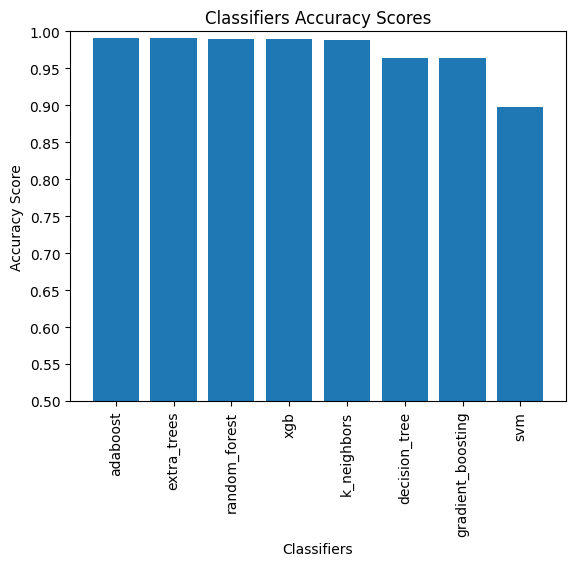

('adaboost', 'extra_trees', 'random_forest', 'xgb', 'k_neighbors', 'decision_tree', 'gradient_boosting', 'svm') (0.991292175683537, 0.991292175683537, 0.9895560645724258, 0.9895560645724258, 0.9877926847004072, 0.9634416812100058, 0.9634325916230367, 0.8972149505526469)


In [10]:
pm1.plot_classifier_acc()

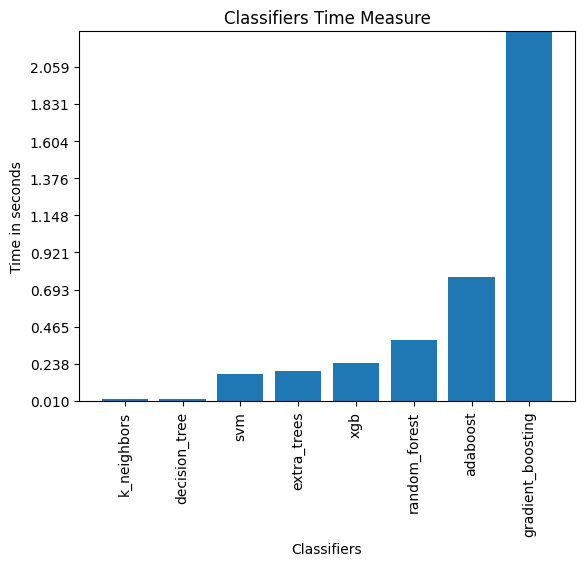

{'adaboost': 0.7687492370605469, 'gradient_boosting': 2.276709794998169, 'random_forest': 0.38440442085266113, 'k_neighbors': 0.0208740234375, 'decision_tree': 0.024791955947875977, 'extra_trees': 0.1910562515258789, 'svm': 0.1772606372833252, 'xgb': 0.24171185493469238}


In [11]:
pm1.plot_classifier_time()

Ensemble

In [12]:
ens1 = ensemble.Ensemble(X, y, features=lasso_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=3) 

In [13]:
pm2 = performanceMetrics.PerformanceMetrics(ens1)
pm2.all_metrics()

["ACC: {'voting': 0.9895560645724258, 'bagging': 0.9895560645724258, 'stacking': 0.9878108638743456}",
 "Roc Auc: {'voting': 0.9642900856793145, 'bagging': 0.9642900856793145, 'stacking': 0.9555181558547531}",
 "F1 score: {'voting': 0.9942027037245529, 'bagging': 0.9942027037245529, 'stacking': 0.9932421866273485}",
 "MCC: {'voting': 0.9429092565643425, 'bagging': 0.9429092565643425, 'stacking': 0.9323755843409969}",
 "MSE: {'voting': 0.010443935427574172, 'bagging': 0.010443935427574172, 'stacking': 0.01218913612565445}"]

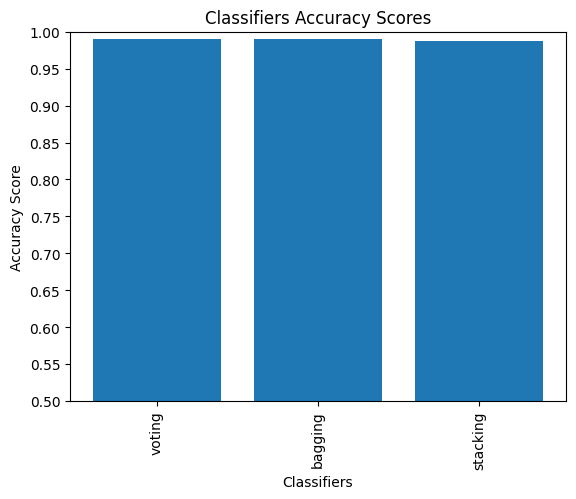

('voting', 'bagging', 'stacking') (0.9895560645724258, 0.9895560645724258, 0.9878108638743456)


In [14]:
pm2.plot_classifier_acc()

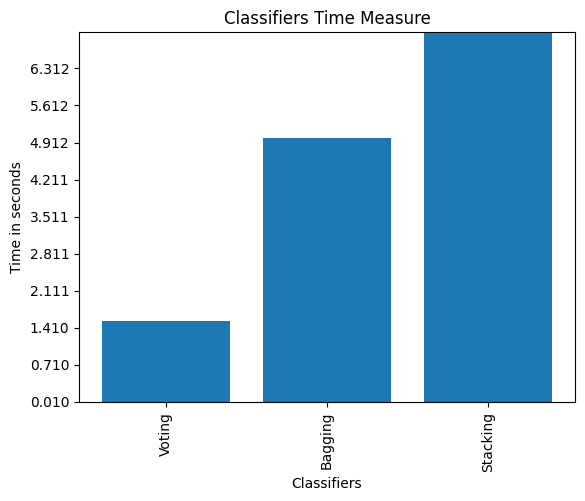

{'Voting': 1.5288622379302979, 'Bagging': 5.005605459213257, 'Stacking': 7.002384185791016}


In [15]:
pm2.plot_classifier_time()